# 3.Calidad de un vino

Dentro de las muchas variedades de vino existentes, algunas gustan más que otras, esto es debido al gusto de una persona en particular o bien a la gran cantidad de químicos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difícil.
Para esta actividad se trabajará con dos datasets asociados a las variantes tinto y blanco del vino portugués ”Vinho Verde”[4]. Debido a temas privados solo se cuenta con las característcas fisioquímicas asociadas a un vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente link. Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,quality, es un valor entero entre 0 y 10.


In [71]:
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
from   sklearn.utils           import check_random_state
from   sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import itertools

Using TensorFlow backend.


#### (a)  Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [36]:
df_red = pd.read_csv("winequality-red.csv",sep=";")
#1 tinto
df_red['Tipo'] = 1
df_white = pd.read_csv("winequality-white.csv",sep=";")
#0 blanco
df_white['Tipo'] = 0

df = pd.concat([df_red,df_white], axis=0)

In [37]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### (b)  Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos,  considerando  como quality mayor  a  5  un  vino  de  buena  calidad.  El  conjunto  de  pruebas (25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

In [38]:
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
df = df.drop('quality',axis=1)
#execute only once

In [39]:
y = df.good_quality
X = df.drop('good_quality')

In [44]:
df.head()

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25, random_state=44)

#### (c)  Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjuntode pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica F1-score [5] sobre el conjunto de entrenamiento y de pruebas.

In [50]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import classification_report,mean_absolute_error
import itertools


def score_the_model(model,x,y,xt,yt,name,targets):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt,yt)
    print("sklearn decision tree, training error: %f" %mean_absolute_error(y, model.predict(x)))
    print("sklearn decision tree, testing error: %f" %mean_absolute_error(yt, model.predict(xt)))
    print ("%s Training Accuracy: %f"%(name,acc_tr))
    print ("%s Test Accuracy: %f"%(name,acc_test))
    print ("Detailed Analysis Testing Results ...")
    print (classification_report(yt, model.predict(xt),target_names=targets))
    
criterion =['gini','entropy']
splitter = ['best','random']
N_t = range(1,8)

for c,s,n in itertools.product(criterion,splitter,N_t):
    name = '{}-{}-{}'.format(c,s,n)
    model = Tree(criterion=c,splitter=s,random_state=0,max_depth=n)
    model.fit(X_train,y_train)
    score_the_model(model,X_train,y_train,X_test,y_test,name,['bueno','malo'])
print('Finalizado.')

sklearn decision tree, training error: 0.000000
sklearn decision tree, testing error: 0.000000
gini-best-1 Training Accuracy: 1.000000
gini-best-1 Test Accuracy: 1.000000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

      bueno       1.00      1.00      1.00       610
       malo       1.00      1.00      1.00      1015

avg / total       1.00      1.00      1.00      1625

sklearn decision tree, training error: 0.000000
sklearn decision tree, testing error: 0.000000
gini-best-2 Training Accuracy: 1.000000
gini-best-2 Test Accuracy: 1.000000
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

      bueno       1.00      1.00      1.00       610
       malo       1.00      1.00      1.00      1015

avg / total       1.00      1.00      1.00      1625

sklearn decision tree, training error: 0.000000
sklearn decision tree, testing error: 0.000000
gini-best-3 Training Accuracy: 1.000000
gini-best-3 Test 

#### (d)  Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la cantidad de árboles de decisión utilizados en el ensamblado ($n_estimators$), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

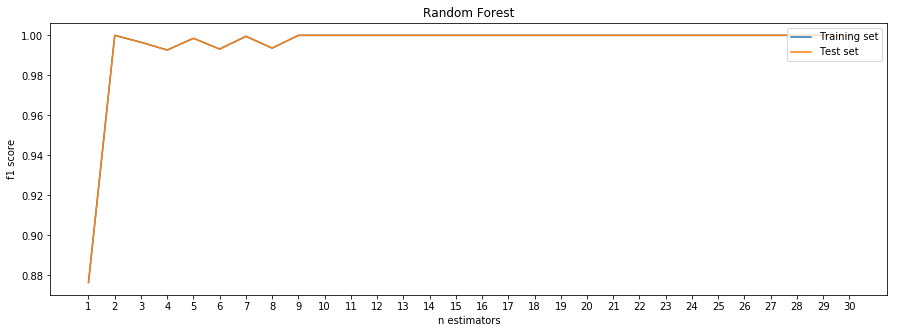

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
N_t = range(1,31)
info_train = []
info_test = []
for n in N_t:
    model = RandomForestClassifier(max_depth=5,n_estimators=n,n_jobs=-1)
    model.fit(X_train,y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
    info_train.append(f1_score(y_true, y_pred))
    info_test.append(f1_score(y_true, y_pred))


plt.figure( figsize=(15,5))
plt.plot(N_t,info_train, label = "Training set")
plt.plot(N_t,info_test, label = "Test set")
plt.xticks(N_t)
plt.xlabel('n estimators')
plt.ylabel('f1 score')
plt.title('Random Forest')
plt.legend(loc = 'upper right')
plt.show()

#### (e)  Entrene  un  ensamblador  de  árboles  de  múltiples  niveles,  mediante  la  técnica  de $AdaBoost$ .  Varíe  la cantidad de árboles de decisión utilizados en el ensamblado ($n_estimators$), realice un gráfico resumendel F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

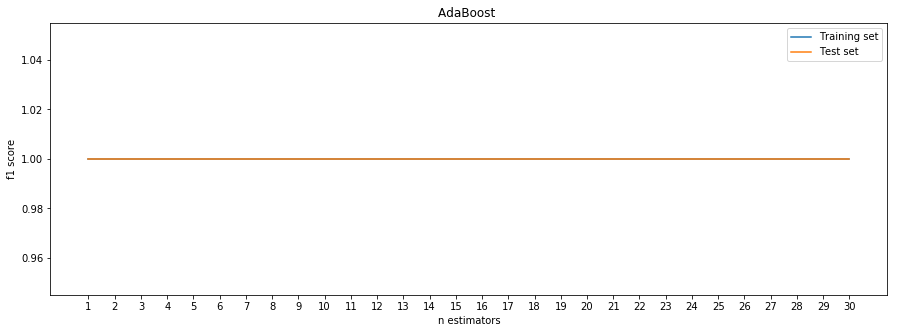

In [66]:
from sklearn.ensemble import AdaBoostClassifier
N_t = range(1,31)
info_train = []
info_test = []
for n in N_t:
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=10), n_estimators=n)
    model.fit(X_train,y_train)
    y_true = y_test
    y_pred = model.predict(X_test)
    info_train.append(f1_score(y_true, y_pred))
    info_test.append(f1_score(y_true, y_pred))


plt.figure( figsize=(15,5))
plt.plot(N_t,info_train, label = "Training set")
plt.plot(N_t,info_test, label = "Test set")
plt.xticks(N_t)
plt.xlabel('n estimators')
plt.ylabel('f1 score')
plt.title('AdaBoost ')
plt.legend(loc = 'upper right')
plt.show()

#### (f)  Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).

In [69]:
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()

In [77]:
print(y_test.shape)

(1625,)


In [80]:
N_t = [pow(2,k) for k in range(6)]
info_train = []
info_test = []
for n in N_t:
    model = Sequential()
    model.add(Dense(n, input_dim=X_train.shape[1], kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(optimizer=SGD(lr=1), loss='poisson', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)
    
    y_true = y_test
    y_pred = model.predict(X_test)
    print(y_pred)
    info_train.append(f1_score(y_train, model.predict(X_train)))
    info_test.append(f1_score(y_true, y_pred))


plt.figure( figsize=(15,5))
plt.plot(N_t,info_train, label = "Training set")
plt.plot(N_t,info_test, label = "Test set")
plt.xticks(N_t)
plt.xlabel('n estimators')
plt.ylabel('f1 score')
plt.title('Random Forest')
plt.legend(loc = 'upper right')
plt.show()

[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]


ValueError: Classification metrics can't handle a mix of binary and continuous targets

#### (g)  Defina  un  criterio  para  estimar  la  importancia  de  los  distintos  atributos  en  el  ensamblado  de $Random Forest$, implementelo  sobre  alguno  de  los  ensambladores  entrenados  en  d),  haga  un  ranking  de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de boost como lo es $AdaBoost$?
